In [1]:
# basic imports of the modules which are required,
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
def parse_datetime(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S,%f')


df = pd.read_csv(
    'sample_logs.csv',
    dtype={'datetime': 'object'}
)

df['datetime'] = df['datetime'].apply(parse_datetime)

df.head()

,datetime,tx_id,sender,recipient_type,recipient_id,amount,description
0,2025-04-14 18:09:34,cb2ab0863e7b44dfa7f330404e4515b2,cb65bb11456649318a33ad6e6d5775ac,user,b6fe5a1b8a1a4ad6962d6197fcd63db2,702.12,"subscription, small loan"
1,2025-04-16 12:21:23,ade0b081406b46f9a78f449a9d30ccb1,0bd9bd6afd034c819bea5ada3963ab37,merchant,54b15344504449d895e80cce102bfbb4,72.71,"gift shopping, credit applied"
2,2025-02-24 10:47:33,cd9d319b542242fd9a91daf26b5bcdbf,9e3af35e9dae4889a4fb2db1df8d163b,merchant,1aa93651bf7847cdb313c7434b2bbbdc,194.96,"subscription, support fee"
3,2025-02-10 03:48:06,db448893e3c04f8f828ca385284056c5,e73896a18eb04ca1b9a9d9ead8f9b682,merchant,0a12b77dcb7242e7b80dac54ab3df685,759.69,"utilities bill, order placed"
4,2025-01-02 19:02:53,bd26c5883fb244e6866ea1cb3c2b2fab,ea7e55c4615e40069876ea94dd24c3c6,user,8585476a93d64f119c22dfa6e5900aae,849.37,"online shopping, membership renewal"


In [4]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        1000 non-null   datetime64[ns]
 1   tx_id           1000 non-null   object        
 2   sender          1000 non-null   object        
 3   recipient_type  1000 non-null   object        
 4   recipient_id    1000 non-null   object        
 5   amount          1000 non-null   float64       
 6   description     1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 54.8+ KB


,datetime,tx_id,sender,recipient_type,recipient_id,amount,description
count,1000,1000,1000,1000,1000,1000.000000,1000
unique,NaN,1000,1000,2,1000,NaN,250
top,NaN,eb2de344aab5493387d91066b63d0a41,34f17219da0141dca504077e6e450724,user,15360a38cc294470afc7232c28dfb7ce,NaN,"online shopping, one-time charge"
freq,NaN,1,1,500,1,NaN,9
mean,2025-03-02 16:22:51.132999936,NaN,NaN,NaN,NaN,497.857060,NaN
min,2025-01-01 00:11:35,NaN,NaN,NaN,NaN,5.560000,NaN
25%,2025-01-30 18:46:40.750000128,NaN,NaN,NaN,NaN,242.380000,NaN
50%,2025-03-02 09:46:09,NaN,NaN,NaN,NaN,493.460000,NaN
75%,2025-04-02 13:26:07,NaN,NaN,NaN,NaN,740.422500,NaN
max,2025-04-30 18:55:12,NaN,NaN,NaN,NaN,996.630000,NaN


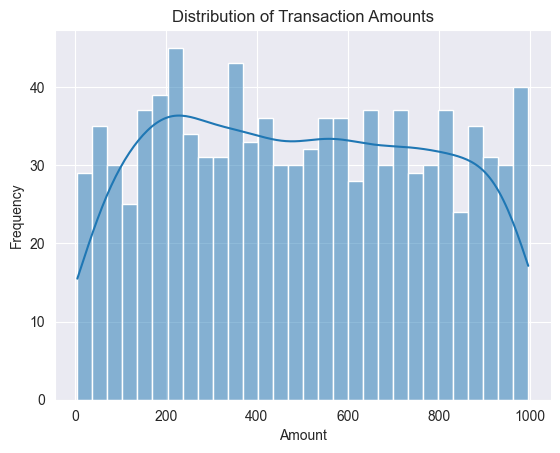

In [5]:
plt.figure()
sns.histplot(df['amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

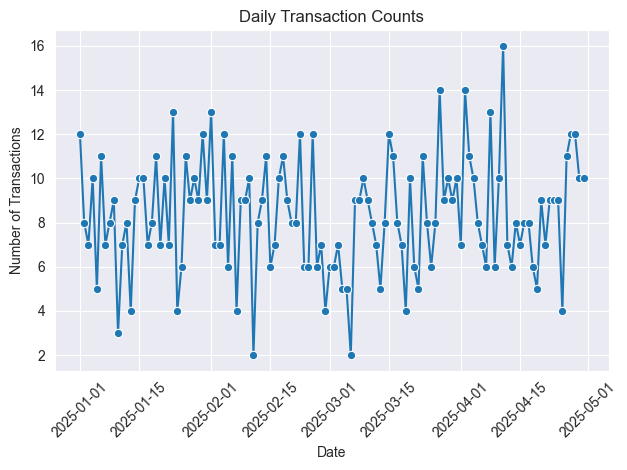

In [6]:
daily_counts = (
    df.set_index('datetime')
      .resample('D')
      .size()
      .reset_index(name='count')
)

plt.figure()
sns.lineplot(data=daily_counts, x='datetime', y='count', marker='o')
plt.title('Daily Transaction Counts')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

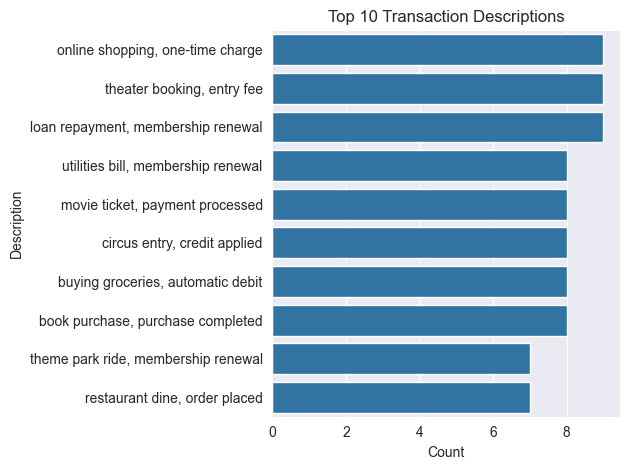

In [7]:
top_desc = df['description'].value_counts().head(10).reset_index()
top_desc.columns = ['description', 'count']

plt.figure()
sns.barplot(data=top_desc, y='description', x='count', orient='h')
plt.title('Top 10 Transaction Descriptions')
plt.xlabel('Count')
plt.ylabel('Description')
plt.tight_layout()
plt.show()

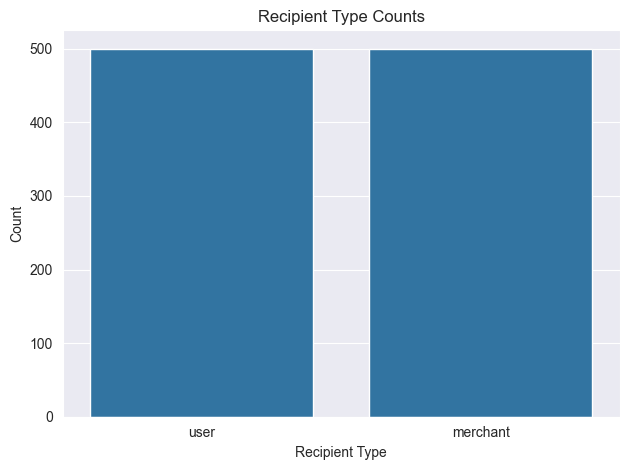

In [8]:
rtype_counts = df['recipient_type'].value_counts().reset_index()
rtype_counts.columns = ['recipient_type', 'count']

plt.figure()
sns.barplot(data=rtype_counts, x='recipient_type', y='count')
plt.title('Recipient Type Counts')
plt.xlabel('Recipient Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [10]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['description'])

In [11]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

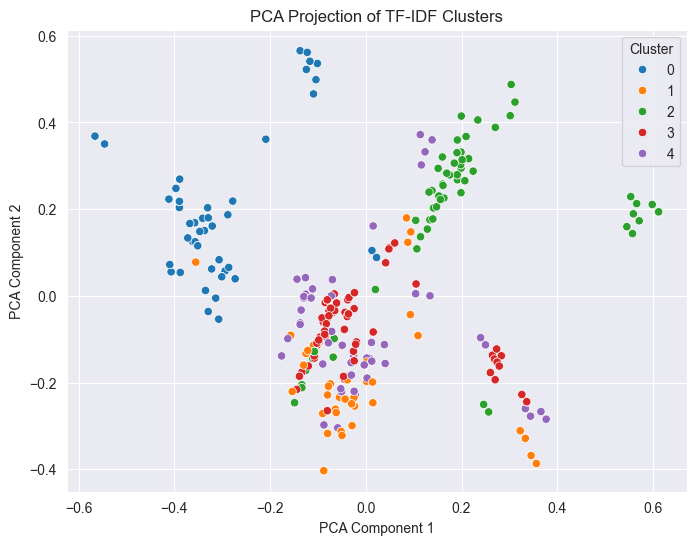

In [12]:
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X.toarray())
df['pca1'] = coords[:, 0]
df['pca2'] = coords[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10', legend='full')
plt.title('PCA Projection of TF-IDF Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

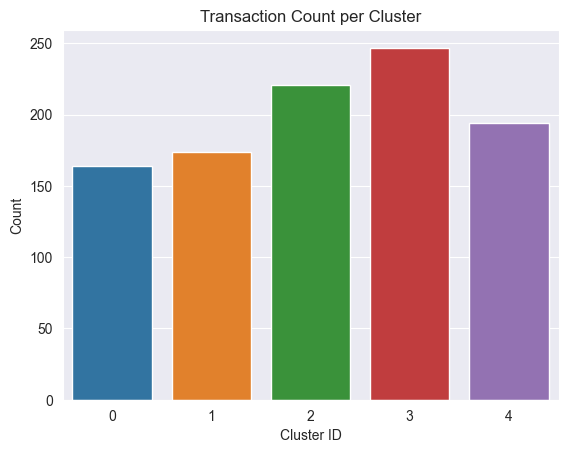

In [13]:
cluster_counts = df['cluster'].value_counts().sort_index().reset_index()
cluster_counts.columns = ['cluster','count']

plt.figure()
sns.barplot(
    data=cluster_counts,
    x='cluster',
    y='count',
    hue='cluster',
    dodge=False,
    palette='tab10',
    legend=False
)
plt.title('Transaction Count per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.show()

In [14]:
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(n_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :5]]
    print(f"Cluster {i}: {', '.join(top_terms)}")

Cluster 0: purchase, book, snacks, completed, fee
Cluster 1: charge, time, ride, theme, park
Cluster 2: fee, event, entry, support, loan
Cluster 3: placed, order, debit, automatic, membership
Cluster 4: applied, booking, credit, theater, voucher
